# M-H(メトロポリス-ヘイスティング)アルゴリズムの例
- メトロポリス-ヘイスティングはMCMCのアルゴリズムの一つ
- 要は、仮定した確率分布から、詳細つり合いの条件を満たす分布の値をサンプリングするための1手法
    - 他に、ギブスサンプラー や ハミルトニアンんモンテカルロ などがある

<br>
    
- 詳細つり合い（=定常分布：時間変化しない確率分布になるための十分条件）
    - 詳細つり合いの例は正規分布の凸のところ。x軸に対して微分=0なので
    
<br>

- M-Hは提案分布を仮定して、詳細つり合いを満たすようパラメータ補正する
- 提案分布はランダムウォークで決める

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use("ggplot")
np.random.seed(123)

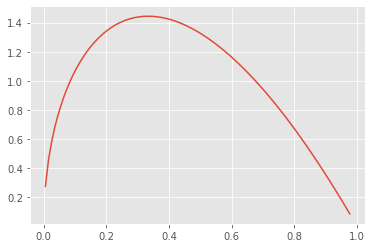

In [3]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001,a,b), beta.ppf(0.999, a,b), 100)
plt.plot(x, beta.pdf(x, a, b))

In [4]:
# M-H
theta = 0.8
NMCS = 20000  # モンテカルロステップ数
epsilon = 0.5  # ランダムウォークの幅（学習率？）
theta_mcs = [theta]
for i in range(NMCS):
    theta_new = theta + epsilon * np.random.randn()  # 正規分布の乱数でランダムウォークさせる
    if beta.pdf(theta_new, a, b) > beta.pdf(theta, a, b):  # 受容するか
        theta = theta_new
    else:
        # 受容しない場合は補正係数下回るか
        r = beta.pdf(theta_new, a, b) / beta.pdf(theta, a, b)
        if np.random.rand() < r:
            theta = theta_new
    theta_mcs.append(theta)
df = pd.DataFrame(theta_mcs)

In [5]:
df.head()

,0
0,0.800000
1,0.257185
2,0.755857
3,0.755857
4,0.755857


Text(0, 0.5, '$\\Theta$')

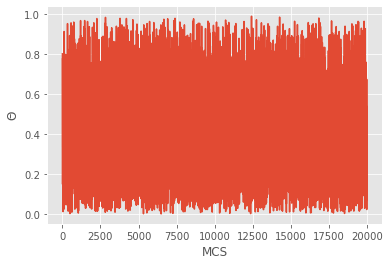

In [7]:
plt.plot(df[0])
plt.xlabel("MCS")
plt.ylabel("$\Theta$")

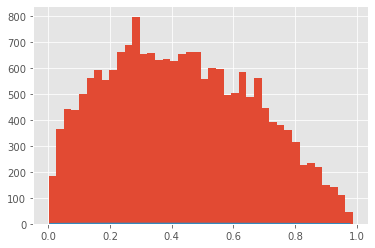

In [8]:
# 提案したベータ分布に近いデータがサンプリングできている
plt.hist(df[0][1000:], bins=40)
x = np.linspace(beta.ppf(0.001,a,b), beta.ppf(0.999, a,b), 100)
plt.plot(x, beta.pdf(x, a, b))